## Parte 2

# Imports

In [1]:
import sys

sys.path.append('..')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Carregando os Dados

In [2]:
df = pd.read_csv('penguins.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [4]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


<AxesSubplot:xlabel='Species', ylabel='count'>

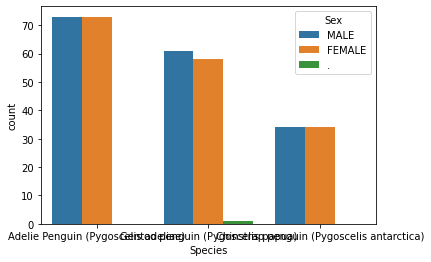

In [5]:
sns.countplot(data=df, x='Species', hue='Sex')

# Abordagem colunas nao numericas:


* studyName - OH
* sample number - remover
* species - OH
* Region - remover
* Island - OH
* Stage - remover
* Individual ID - remover
* Clutch Completion - OH
* Date Egg - timestamp
* Sex - remover
* Comments - remover


In [6]:
# removendo colunas
df.drop(['Sample Number', 'Region', 'Stage', 'Individual ID', 'Sex', 'Comments'], axis=1, inplace=True)


In [7]:
# remover colunas com Culmen Length, Culmen Depth, Flipper Lenght, Body Mass, Delta 15 N e Delta 13 C faltando
#df[pd.isnull(df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]).all(axis=1)]

df.drop([3, 271], axis=0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            342 non-null    object 
 1   Species              342 non-null    object 
 2   Island               342 non-null    object 
 3   Clutch Completion    342 non-null    object 
 4   Date Egg             342 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Delta 15 N (o/oo)    330 non-null    float64
 10  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(5)
memory usage: 32.1+ KB


<AxesSubplot:>

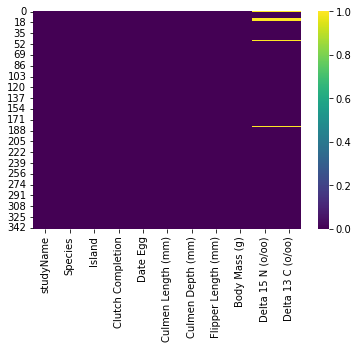

In [8]:
sns.heatmap(df.isnull(), cmap='viridis')

In [9]:
sns.pairplot(df, hue='Species')

# pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
X = df.drop(['Species'], axis=1)
y = df['Species'].astype('category').cat.codes

# date egg to  (timestemp)
X['Date Egg'] = pd.to_datetime(X['Date Egg']).view(np.int64).apply(lambda x : x // 10**9)

# array de colunas numericas
numerical_cols = X.select_dtypes(include=[np.float64, np.int64]).columns
# ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

#array de colunas categoricas
categorical_cols = X.select_dtypes(include=np.object).columns
# ['studyName', 'Island', 'Clutch Completion', 'Date Egg']

In [ ]:
# pipeline numerico
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


#pipeline categorico
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False))
])


# aplicando os pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [2]:
from Modelos.KNearestNeighbor import KNearestNeighbor
from Modelos.NaiveBayes import NaiveBayes

In [ ]:
# Criando os modelos
KNN_BruFor = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNearestNeighbor(neighbors=5))
])

KNN_KDTree = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNearestNeighbor(policy='KDTree'))
])

NB = Pipeline([
    ('preprocessor', preprocessor),
    ('model', NaiveBayes())
])

## Treniando modelos

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
KNN_BruFor.fit(X_train, y_train)
KNN_KDTree.fit(X_train, y_train)
NB.fit(X_train, y_train)

Brute Force model Fitted!
KDTree builded!


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                            

# Analisando os modelos

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
BruFor_pred = KNN_BruFor.predict(X_test)
KDTree_pred = KNN_KDTree.predict(X_test)
NB_pred = NB.predict(X_test)

In [ ]:
print('Forca bruta KNN:\n')
print(confusion_matrix(BruFor_pred, y_test))
print(classification_report(BruFor_pred, y_test))

Forca bruta KNN:

[[48  0  0]
 [ 2 18  0]
 [ 0  0 35]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.90      0.95        20
           2       1.00      1.00      1.00        35

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103



In [ ]:
print('KDTree KNN:\n')
print(confusion_matrix(KDTree_pred, y_test))
print(classification_report(KDTree_pred, y_test))

KDTree KNN:

[[49  0  0]
 [ 1 18  0]
 [ 0  0 35]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        49
         1.0       1.00      0.95      0.97        19
         2.0       1.00      1.00      1.00        35

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103



In [ ]:
print('NaiveBayes:\n')
print(confusion_matrix(NB_pred, y_test))
print(classification_report(NB_pred, y_test))

NaiveBayes:

[[45  0  0]
 [ 2 18  0]
 [ 3  0 35]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        45
           1       1.00      0.90      0.95        20
           2       1.00      0.92      0.96        38

    accuracy                           0.95       103
   macro avg       0.97      0.94      0.95       103
weighted avg       0.96      0.95      0.95       103

